Things to do before class:<br>
Read the theory behind the code<br>
Make a jupyter notebook for the notes from the reading <br>
Use Git/GitHub to track changes <br>

First Assignment:<br>
Sent via email next week <br>
Turn in on GitHub <br>

GOOHF Cards: <br>
Must redeem on slack: <br>
    Say I want to use a GOOHF card to add one day of extension on the assignment deadline<br>
    

Final Exam: <br>
In class exam:<br>
Short with theory and programming 

GitStuff: <br>
git status checks changes of the files you are working on 

git pull pulls the latest versions of the files  <br>
git checkout followed by the local file path, allows for the files to be overwritten from git hub <br>
    note: if you want to keep the changes that you made locally, save the file locally in a different path<br>
=================================================================<br>
    

Phugoid Motion (First Lesson in Numerical Mooc) <br>
    ODE - Ordinary Differential Equation <br>
    Time-marching methods<br>
        Eurler's Method<br>
        RK<br>
        ...<br>
<br>
<br>
Classic Pendulum Problem: <br>
Gravity, Mass, Tension, Theta<br>

d^2/dt^2 + g/l * sin(theta) = 0
<br>
<br>
2nd order ODE<br>
Unknown: Theta<br>
independant Variable: t<br>        

Phugoid Motion:<br>
    Motion pattern where an aircraft oscillates up and down<br>
    Oscillations in altitude, speed, pitch angle <br>
    Continuous exchange between kinetic energy and potential energy<br>
    May lead to stall, loops, or materrial damages<br>

Pitch angle, flight trajectory, AoA (Angle of Attack)<br>
Trim Conditions: Aircraft is going on a steady angle with variables z_t and v_t<br>

Assumptions: <br>
    AoA is constant, pitch angle is constant

Forces acting on the glider:<br>

Gravity, Drag, Lift, Weight

C_l: Lift Coefficient<br>

C_d: Drag Coefficient

AoA is constant therefore C_l and C_d is constant 

L = c_L * S * 1/2 * density * v^2

D = C_d * S * 1/2 * density * v^2

Sum of forces = 0:<br>
    L = Wcos(gamma)<br>
    D = Wsin(gamma)<br>
    gamma = pitch angle<br>

Assumption: No friction therefore D = 0

L = W

W = C_L * S * 1/2 * density * v_t^2

L/W = v^2/v_t^2

Lift is perpendicular to the trajectory of the glider<br>

L + W = m * dv/dt (in tangential) + m * v^2/R (mass vector)

Projection of the above equation: <br>
L - W cos(theta) = mv^2/R<br>
v^2/v_t^2 - cos(theta) = v^2/gR

R = the radius off curvature of the trajectory 

Second Equation gives:<br>
    z/z_t - cos(theta) = 2z/R

derivation: <br>
    ds = R * dtheta<br>
    dz = - sin(theta) * ds<br>
    l/R = dtheta/ds = dtheta/dz * dz/ds = - sin(theta) * dtheta/dz<br>

phugiod equation: <br>
    sqrt(z)/2z_t = cos(theta)/2sqrt(z) - sqrt(z)sin(theta) dtheta/dz<br>
    rhs = d/dz (sqrt(z))cos(theta)

integrating both sides:<br> [EQ.1]<br>
    cos(theta) = 1/3 * z/z_t + c * sqrt(z_t/z)<br>

Derivative with respect to theta<br>  [EQ.2]<br>
    z/R = 1/3 - c/2 * sqrt(z_t^3/z^3) = R(z)

Ex/Problem <br> Steady Horizontal Flight Z_o<br>With Initial Perturbation theta_o<br>

Given: <br>
    Z_o and theta_o<br>
    Compute c using [EQ.1]<br>

Given:<br>
    Z_o and C (center of rotation)<br>Compute R (Center of rotation) using [EQ.2]<br>

=========================================================================================================================

In [4]:
import matplotlib
%run phugoid.py
%matplotlib inline

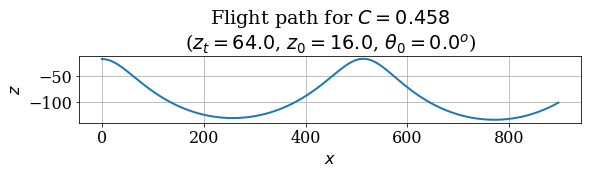

In [5]:
# Initial conditions: zt = 64.0, z0 = 16.0, theta0 = 0.0.
plot_flight_path(64.0, 16.0, 0.0)

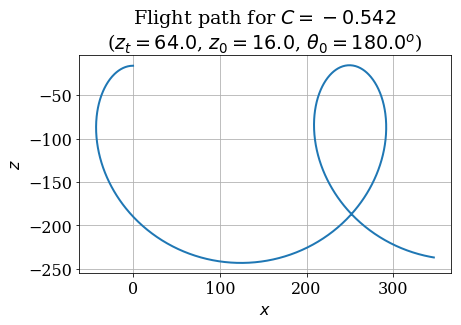

In [6]:
# Initial Conditions: zt = 64.0 z0 = 16, theta = 180
plot_flight_path(64.0,16.0,180.0)

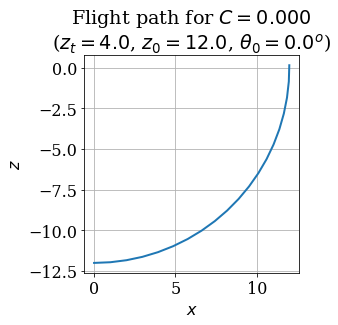

In [7]:
plot_flight_path(4,12,0.0)

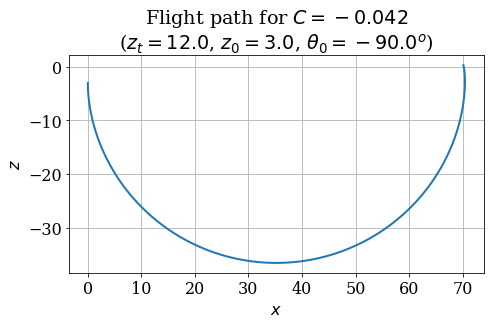

In [8]:
plot_flight_path(12,3,-90)

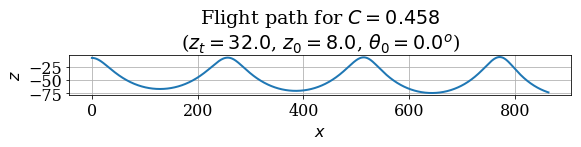

In [9]:
plot_flight_path(32, 8, 0)

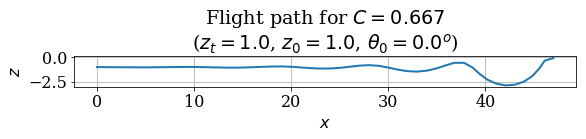

In [10]:
plot_flight_path(1,.99,0)

========================================================================================<br>
Lesson 2

In [29]:
import numpy
from matplotlib import pyplot

In [30]:
%matplotlib inline

In [31]:
# Time Variables
T = 100.0
dt = 0.02
N = int(T / dt) + 1
t = numpy.linspace(0.0, T, num = N)

In [32]:
t = numpy.arange(0, 100.02, 0.02)

In [33]:
#Initial Conditions
z0 = 100.0
b0 = 10.0
zt = 100.0
g = 9.81

#Initial Solution 
u = numpy.array([z0, b0])

#Solution Array
z = numpy.zeros(N)
z[0] = z0

In [34]:
#Iterating the Solution
for n in range(1, N):
    rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

In [35]:
#Exact Solution 
z_e = (b0 * (zt/g)**0.5)*numpy.sin(((g/zt)**0.5)*t) + (z0-zt)*numpy.cos(((g/zt)**0.5)*t) + zt
# ** is for square root


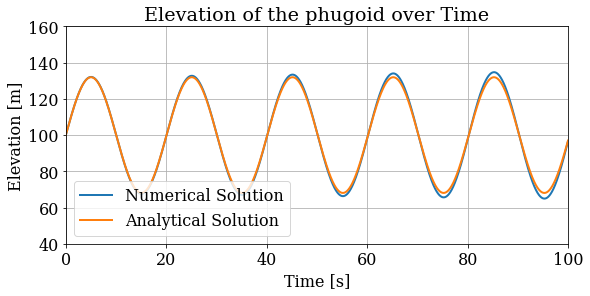

In [36]:
#Pyplot Parameters IMPORTANT TO KNOW - MAKES IT LOOK CLEAN
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

#Plotting the solution SAME AS MATLAB COMMANDS (MATLAB LIBRARY)
pyplot.figure(figsize = (9.0, 4.0))
pyplot.title('Elevation of the phugoid over Time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0], t[-1])
pyplot.ylim(40.0, 160.0)
pyplot.grid()
pyplot.plot(t, z, label ='Numerical Solution', color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_e, label = 'Analytical Solution', color = 'C1', linestyle = '-', linewidth = 2)
pyplot.legend();

In [37]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
z_v = []

for dt in dt_values:
    N = int(T/dt) + 1
    t = numpy.linspace(0.0, T, num = N)
    
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t) #This command gives an array that is the same in type and shape 
    z[0] = z0
    
    for n in range(1,N):
        rhs =  numpy.array([u[1], g*(1-u[0]/zt)])
        u = u+dt*rhs
        z[n] = u[0]  #store the delta at n+1
    z_v.append(z) #stores the delta v. t
    

In [38]:
def l1_error(z, z_e, dt):
    error = dt * numpy.sum(numpy.abs(z-z_e))
    return error

In [39]:
error_values = []

for z, dt in zip(z_v, dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0.0,T,num = N)
    z_e = (b0 * (zt/g)**0.5)*numpy.sin(((g/zt)**0.5)*t) + (z0-zt)*numpy.cos(((g/zt)**0.5)*t) + zt
    error_values.append(l1_error(z, z_e, dt))
    

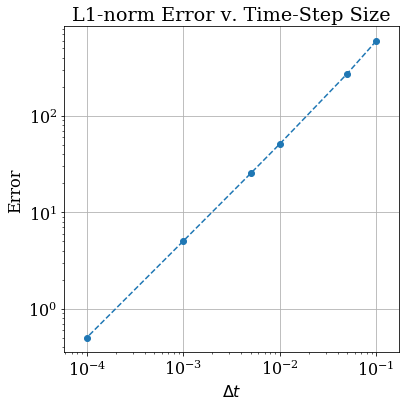

In [40]:
#For analyzing errors, it is best to use a plot with a logarithmic scale
#To Do so, use the function pyplot.loglog
pyplot.figure(figsize = (6.0,6.0))
pyplot.title('L1-norm Error v. Time-Step Size')
pyplot.xlabel('$\Delta t$') # Use for character commands
pyplot.ylabel('Error')
pyplot.grid() #turns on grid
pyplot.loglog(dt_values, error_values, color = 'C0', linestyle = '--', marker = 'o')
pyplot.axis('equal'); #Scale axis equally

In [70]:
#def my_equation(euler_lower, euler_upper, eq_zt):
#    x = g * (1 - euler_lower/eq_zt)
#    return x
def euler_method(end_N, euler_dt, euler_u0, euler_u1, euler_zt):
    x = 1.0
    u = [euler_u0,euler_u1]
    for n in range(1, end_N):
#        my_equation(euler_lower = u[0], euler_upper = u[1], eq_zt = euler_zt)
        rhs = numpy.array([u[1] , g*(1-u[0]/euler_zt)])
        u = u + euler_dt * rhs
        z[n] = u[0]
    return z
    
    

In [71]:
z_func = euler_method(end_N = N, euler_dt = dt, euler_u0 = z0, euler_u1 = b0, euler_zt = 100.0)

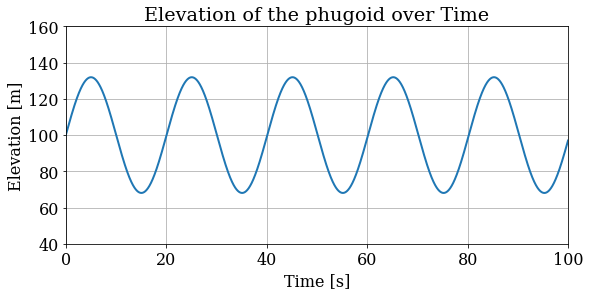

In [72]:
#Pyplot Parameters IMPORTANT TO KNOW - MAKES IT LOOK CLEAN
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

#Plotting the solution SAME AS MATLAB COMMANDS (MATLAB LIBRARY)
pyplot.figure(figsize = (9.0, 4.0))
pyplot.title('Elevation of the phugoid over Time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0], t[-1])
pyplot.ylim(40.0, 160.0)
pyplot.grid()
pyplot.plot(t, z_func, color='C0', linestyle='-', linewidth=2)

Commented Out Function Needs Improvement but was not assigned